## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import matplotlib as mpl

In [4]:
from IPython.display import Image

# Функция `plot`

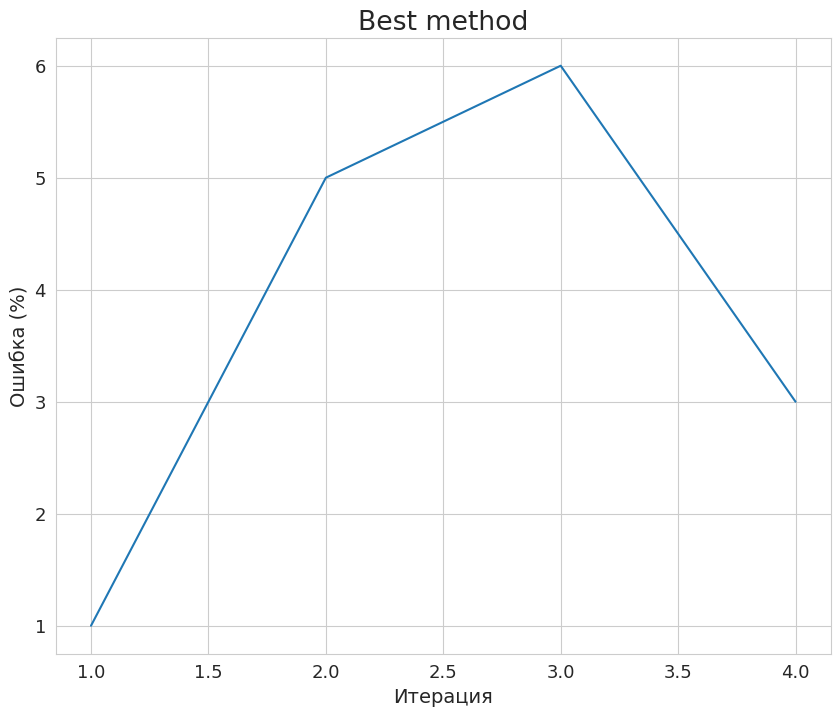

In [5]:
x = [1, 2, 3, 4]
y = np.array([1, 5, 6, 3])
plt.xlabel("Итерация")
plt.ylabel("Ошибка (%)")
plt.title("Best method")
plt.plot(x, y)

(np.float64(-1.0), np.float64(5.0), np.float64(0.0), np.float64(6.0))

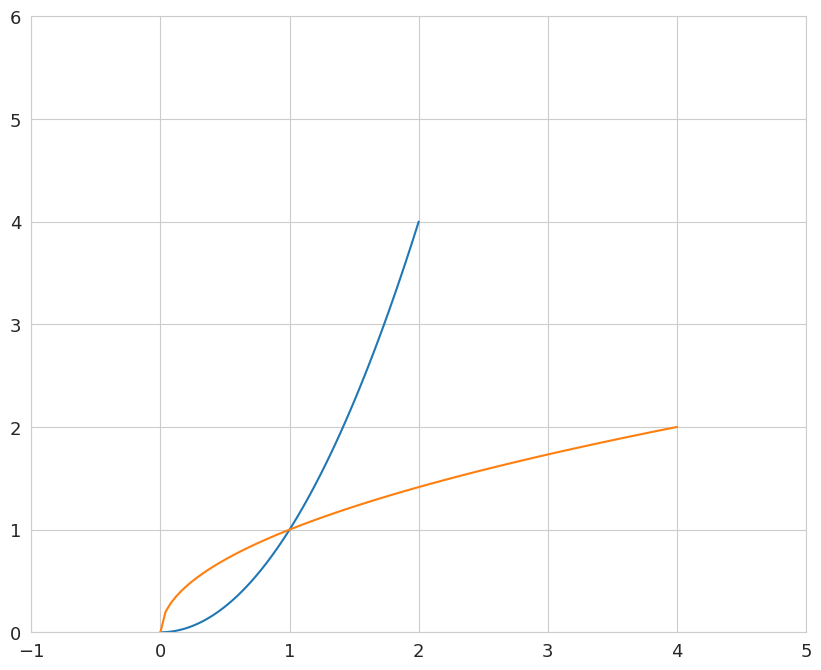

In [6]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2)
x = np.linspace(0, 4, 100)
plt.plot(x, np.sqrt(x))
plt.grid(True)
#plt.axis('equal')
plt.axis([-1, 5, 0, 6])
#plt.xlim(-1, 5)
#plt.ylim(0, 6)

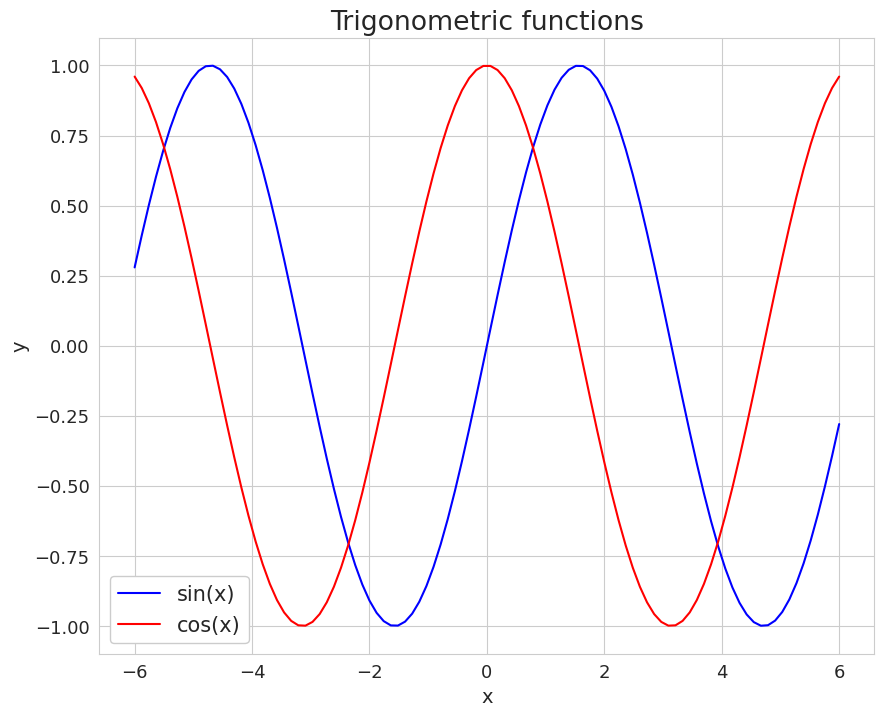

In [7]:
x = np.linspace(-6, 6, 100)
plt.plot(x, np.sin(x), 'b', label = 'sin(x)')
plt.plot(x, np.cos(x), 'r', label = 'cos(x)')
#axis('equal')
plt.legend(loc = 'best', framealpha = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric functions')
pass

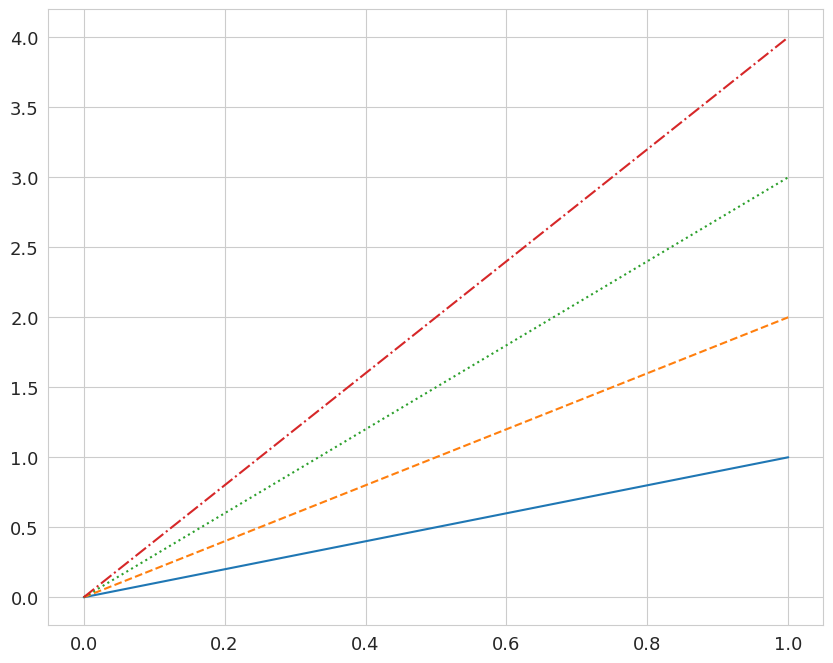

In [8]:
x = np.linspace(0, 1, 3)
plt.plot(x, x, '-', x, 2*x, '--', x, 3*x, ':', x, 4*x, '-.')

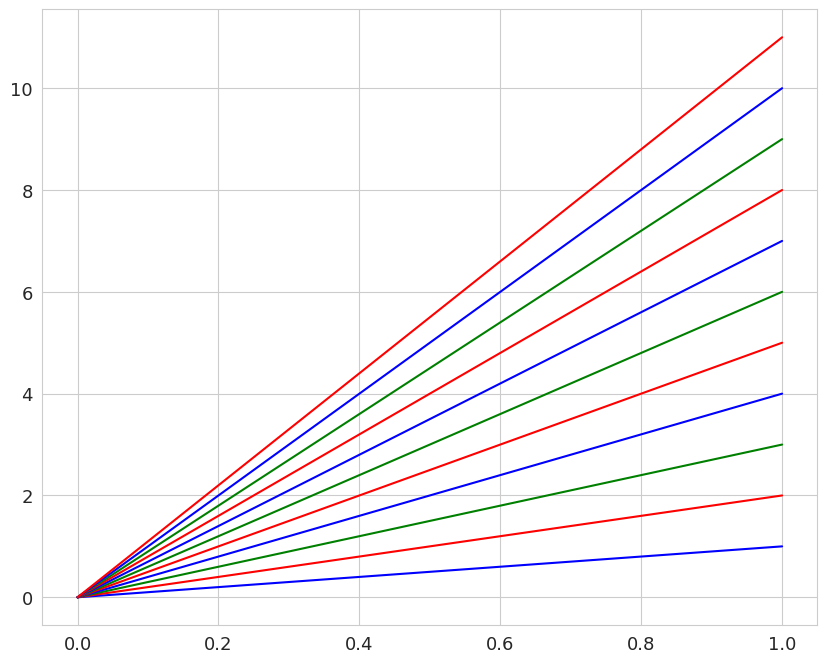

In [9]:
from cycler import cycler
# Change the default cycle colors to be red, green, blue, and yellow
plt.rc('axes', prop_cycle=(cycler('color', ['b', 'r', 'g'])))
x = np.linspace(0, 1, 3)
plt.plot(x, x, x, 2*x, x, 3*x, x, 4*x, x, 5*x, x, 6*x, x, 7*x, x, 8*x, x, 9*x, x, 10*x, x, 11*x)

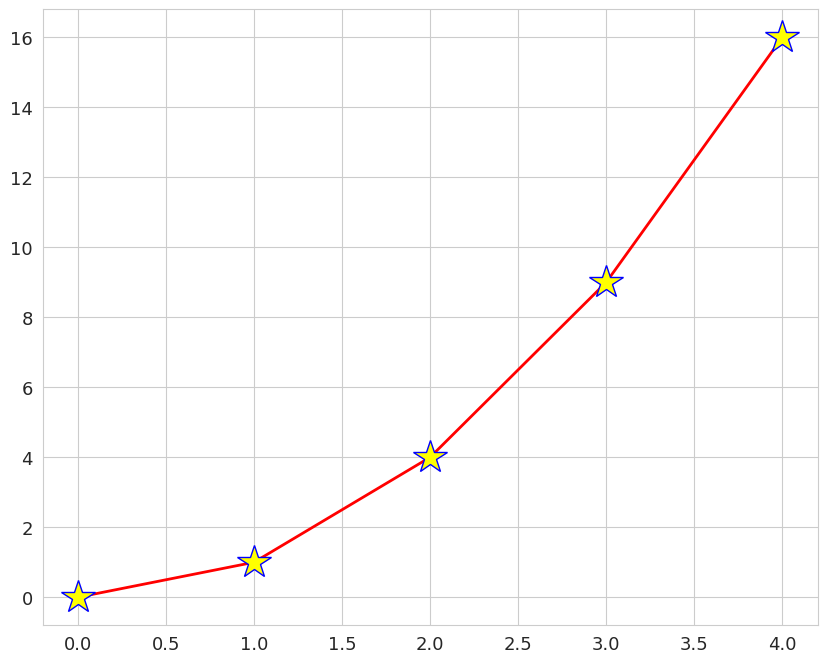

In [10]:
x = np.array([0, 1, 2, 3, 4])
y = x**2
plt.plot(x, y, marker = '*', color = 'red', linewidth = 2, \
         markerfacecolor = 'yellow', markeredgecolor = 'blue', \
         markersize = 25)

Text(0.5, 4.5, 'Marker examples')

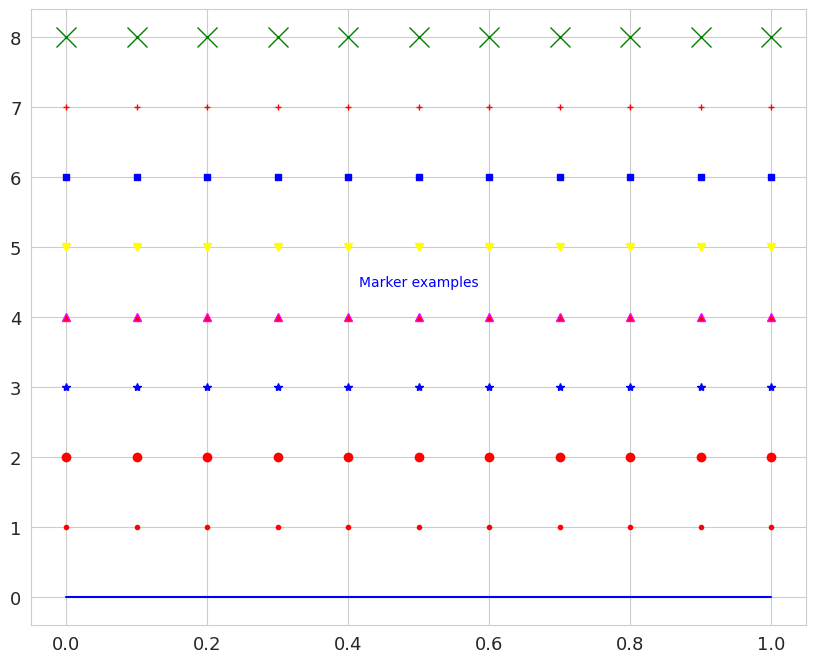

In [11]:
x = np.linspace(0, 1, 11)
y = np.zeros(x.shape)
plt.plot(x, y,     '-')
plt.plot(x, y + 1, '.')
plt.plot(x, y + 2, 'o', markerfacecolor = 'red', markeredgecolor = 'red')
plt.plot(x, y + 3, '*')
plt.plot(x, y + 4, '^', markeredgecolor = 'magenta')
plt.plot(x, y + 5, 'v', markerfacecolor = 'yellow', markeredgecolor = 'yellow')
plt.plot(x, y + 6, 's', markersize = 4, markeredgecolor = 'blue')
plt.plot(x, y + 7, '+', markersize = 5)
plt.plot(x, y + 8, 'x', markersize = 15)
plt.text(.5, 4.5, 'Marker examples',
         horizontalalignment = 'center', verticalalignment = 'center',
         fontsize = 10, color = 'blue')
#plt.ylim([-1, 9])

In [12]:
plt.figure()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

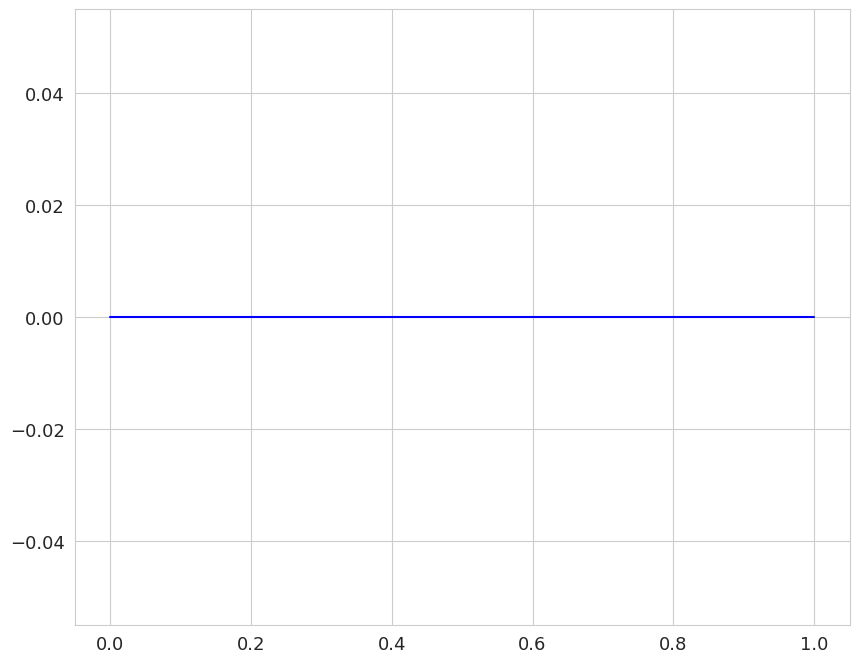

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(x, y,     '-')

In [14]:
plt.show()

### Параметрические графики
$$
x = \sin t/t,
\quad
y = \cos t/t
$$
$x = \frac{\sin t}{t},\ y = \frac{\cos t}{t}$

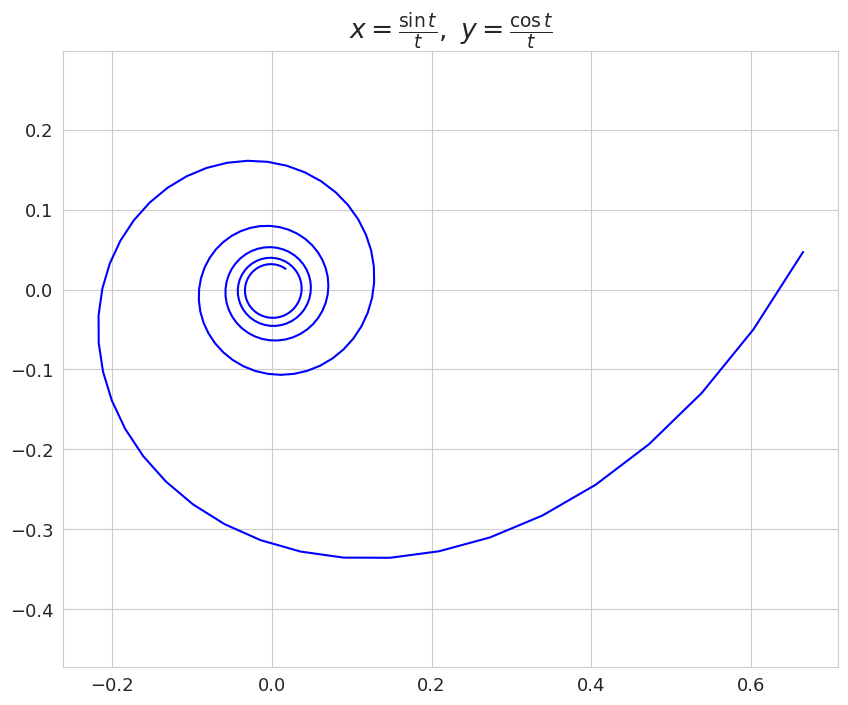

In [15]:
t = np.linspace(1.5, 32, 200)
plt.axis('equal')
plt.title(r'$x = \frac{\sin t}{t},\ y = \frac{\cos t}{t}$')
x = np.sin(t)/t
y = np.cos(t)/t
plt.plot(x, y)

## Чтение данных

In [16]:
from sklearn.datasets import fetch_california_housing

In [17]:
#Цены Магнит
prices = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/Magnit.csv')
prices['date'] = pd.date_range('1/1/2023', periods=len(prices), freq='D')
share = pd.Series(prices.Magnit.ravel(), index=prices.date)

#Набор данных "Чаевые"
tips = sns.load_dataset('tips')

#Набор данных "Цены на недвижимость в Калифорнии"
bunch = fetch_california_housing()
df, y = pd.DataFrame(data=bunch.data, columns=bunch.feature_names), bunch.target
df['target'] = y

<ipython-input-17-69dcbc930bd0>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  share = pd.Series(prices.Magnit.ravel(), index=prices.date)


# Данные изменяющиеся во времени

## График (Line plot)

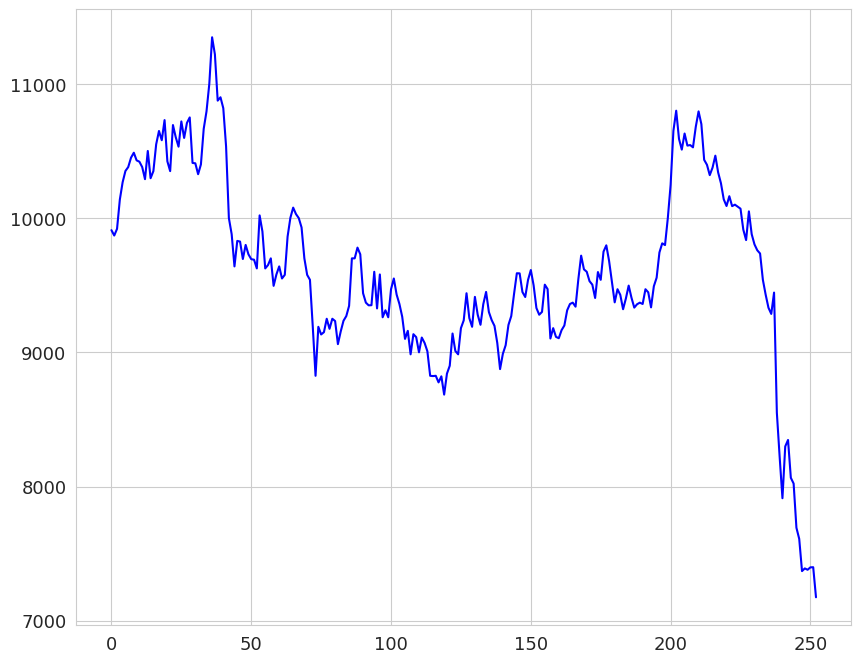

In [18]:
plt.plot(prices.Magnit);

__Когда использовать?__

Когда нужно показать изменение показателя во времени

## Гистограмма (Bar plot)

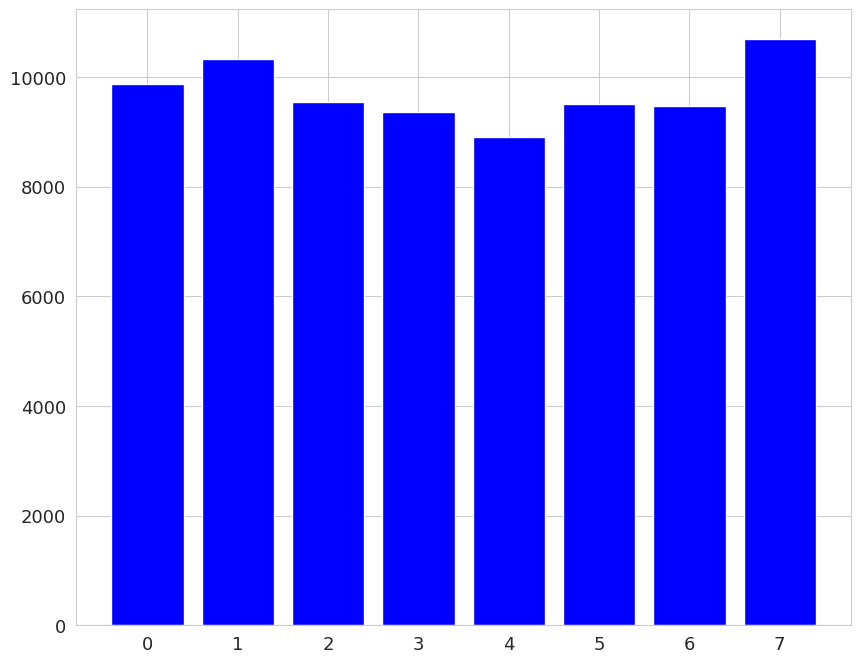

In [19]:
plt.bar(range(len(prices[1:220:30])), prices.Magnit[1:220:30]);

## Гистограмма с областями (Area plot)

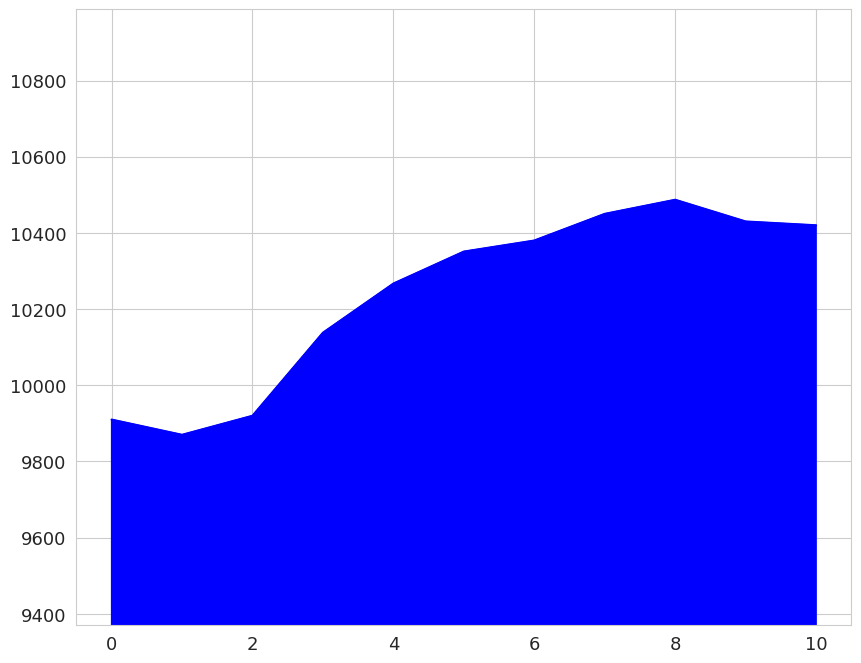

In [20]:
part = prices.Magnit[:11]
part.plot.area(ylim=[part.min() - 500, part.max() + 500]);

Хорошо показывает общий объем.

# Отклонения

## Диаграмма с отклонениями (Bar plot)

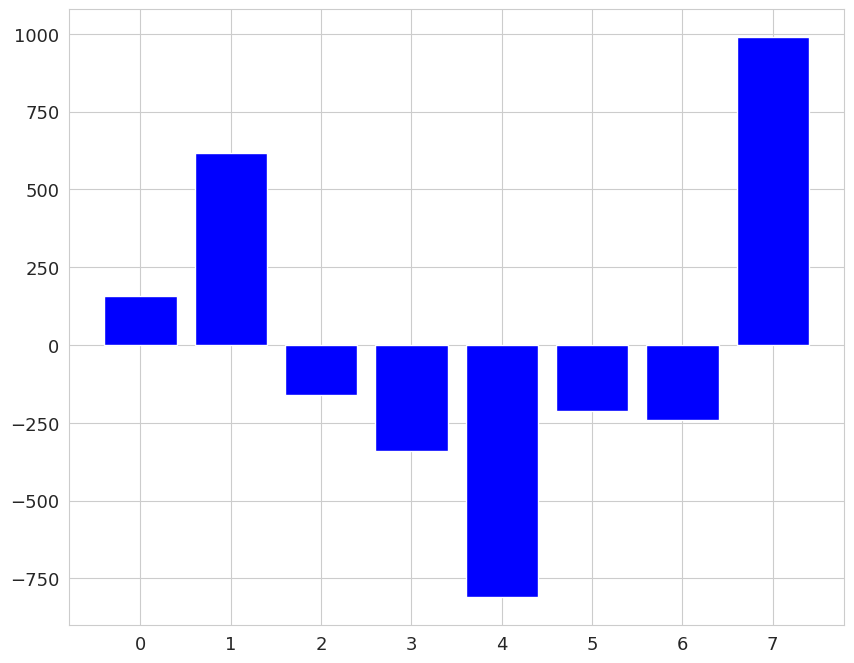

In [21]:
some_prices = prices.Magnit[1:220:30]
some_prices -= some_prices.mean()
plt.bar(range(len(some_prices)), some_prices);

## Диаграмма разброса (Spine chart)

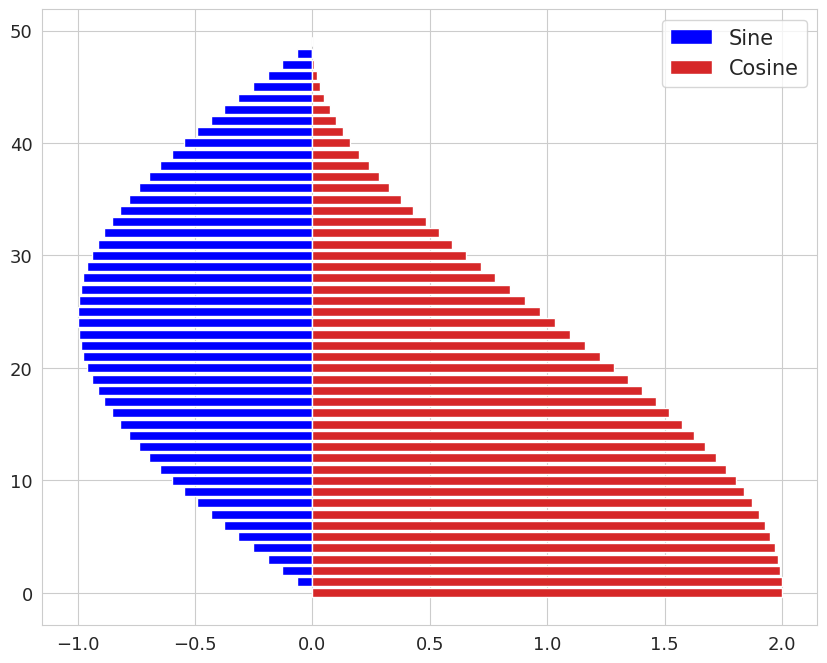

In [22]:
a = np.sin(np.linspace(0, np.pi))
b = np.cos(np.linspace(0, np.pi)) + 1
ind = range(len(a))

plt.barh(ind, -a, label='Sine');
plt.barh(ind, b, color='#d62728', label='Cosine');
plt.legend();

# Корреляция

## Поле корреляции (Scatterplot)

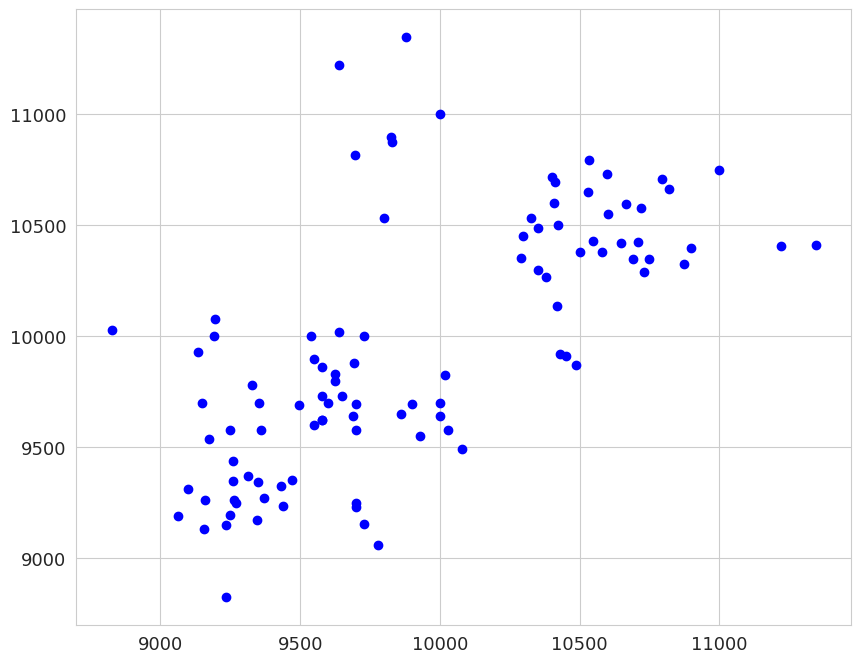

In [23]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

plt.scatter(data_lag, data);

## Connected scatterplot

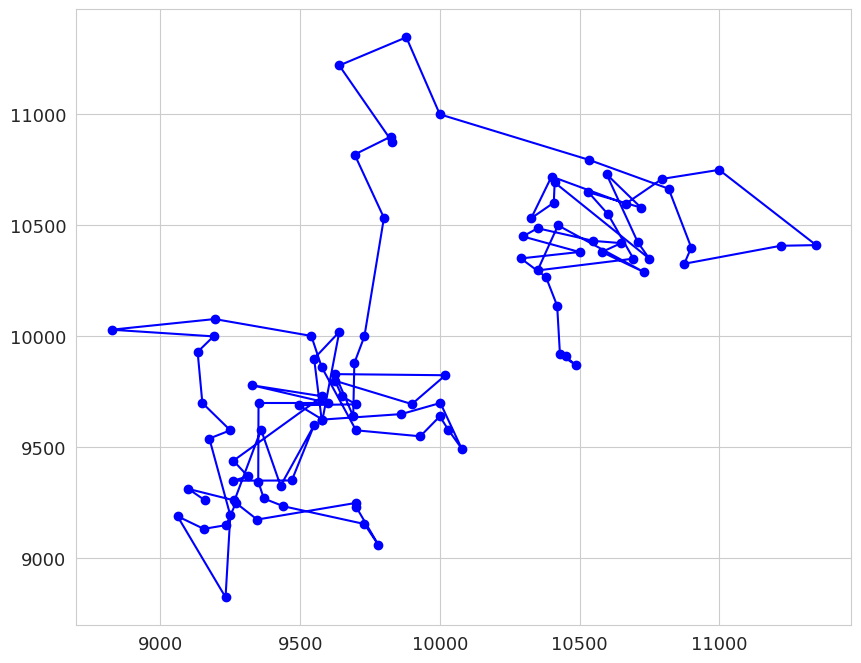

In [24]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

plt.scatter(data_lag, data);
plt.plot(data_lag, data);

## Bubble plot

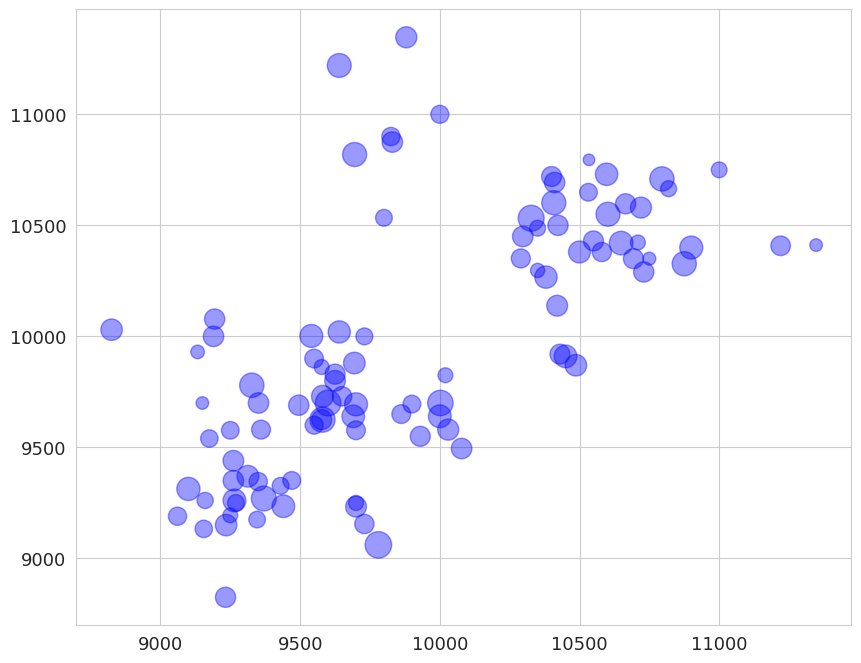

In [25]:
data = prices.Magnit[0:100]
data_lag = prices.Magnit[7:107]

sizes = np.random.randn(len(data))
sizes += np.abs(1.5*sizes.min())
sizes *= 70

plt.scatter(data_lag, data, s=sizes, alpha=0.4);

Like a scatterplot, but adds additional detail by sizing the circles according to a third variable

## Тепловая карта (Heatmap)

In [26]:
sns.heatmap(tips.corr(), annot=True, lw=1);

ValueError: could not convert string to float: 'No'

# Распределение

## Гистограмма (Histogram)

In [ ]:
prices.Magnit.hist();

## Ящик с усами (Boxplot)

In [ ]:
sns.boxplot(y='smoker', x='tip', orient='h', data=tips);

## Cкрипичная диаграмма (Violin plot)

In [ ]:
sns.violinplot(y='smoker', x='tip', orient='h', data=tips);

## Роевая диаграмма (Swarm plot)

In [ ]:
sns.swarmplot(y='smoker', x='tip', orient='h', data=tips);

## Одномерная диаграмма рассеяния (Stripplot)

In [ ]:
sns.stripplot(y='smoker', x='tip', orient='h', data=tips, jitter=True);

# Отношение "часть-целое"

## Stacked normalized (percentage) bar plot

In [ ]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])

f, ax = plt.subplots(1, figsize=(10,5))

bar_width = 1

bar_l = [i for i in range(len(df['pre_score']))]

tick_pos = [i+(bar_width/2) for i in bar_l]

totals = [i+j+k for i,j,k in zip(df['pre_score'], df['mid_score'], df['post_score'])]
pre_rel = [i / j * 100 for  i,j in zip(df['pre_score'], totals)]
mid_rel = [i / j * 100 for  i,j in zip(df['mid_score'], totals)]
post_rel = [i / j * 100 for  i,j in zip(df['post_score'], totals)]

ax.bar(bar_l, pre_rel,                  label='Pre Score', alpha=0.9, color='#019600', width=bar_width, edgecolor='white')
ax.bar(bar_l, mid_rel,  bottom=pre_rel, label='Mid Score', alpha=0.9, color='#3C5F5A', width=bar_width, edgecolor='white')
ax.bar(bar_l, post_rel, bottom=[i+j for i,j in zip(pre_rel, mid_rel)], label='Post Score',alpha=0.9,
       color='#219AD8', width=bar_width,edgecolor='white')

plt.xticks(tick_pos, df['first_name'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")
ax.margins(0);

plt.show()

## Круговая диаграмма (Pie chart)

In [ ]:
tips.day = tips.day.astype('category')
f, ax = plt.subplots(1, figsize=(7,7))
tips.groupby('day').agg('sum')['tip'].plot.pie(ax=ax, shadow=True, startangle=90,
                                               colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']);

In [ ]:
# Более сложное рисование, например, с несколькими графиками
f, axs = plt.subplots(1,3, figsize=(20, 5))
prices.Magnit.plot(ax=axs[0]);
prices.Magnit.hist(bins=20, ax=axs[1]);
prices.Magnit.plot.kde(ax=axs[2]);

## Дополнительные возможности Seaborn

In [ ]:
sns.set()

In [ ]:
# Диаграмма рассеяния
sns.lmplot(x='total_bill', y='tip', data=tips);

In [ ]:
# Плотность распределения
sns.displot(tips.total_bill, bins=20);

In [ ]:
# Карта распределения по признакам
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(plt.hist, 'total_bill');

In [ ]:
# Ящик с усами по признакам
def myFancyBoxplot(x, *args, **kwargs):
    return plt.boxplot(x.ravel())

g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(myFancyBoxplot, 'total_bill');

---

In [ ]:
# Парные диаграммы
f, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, ax=axs[0]);
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="quart", ax=axs[1]);

In [ ]:
# Диаграмма рассеяния
sns.pairplot(tips, hue='sex');

## Задание

In [27]:
# Набор данных о покемонах
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/pokemon_full.csv')
df.drop('Number', axis=1, inplace=True)

In [28]:
print(df.shape)

df.head()

(721, 22)


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


## Задание 1
Нужно построить 4 гистограммы (histogram) на 30 карманов (бинов) главных 4 характеристик покемонов:
- HP - здоровья
- Attack - уровня атаки
- Defense - уровня защиты
- Speed - скорости
Построить их надо на одном графике с 4 подграфиками (axes). Нужно использовать параметр figsize.

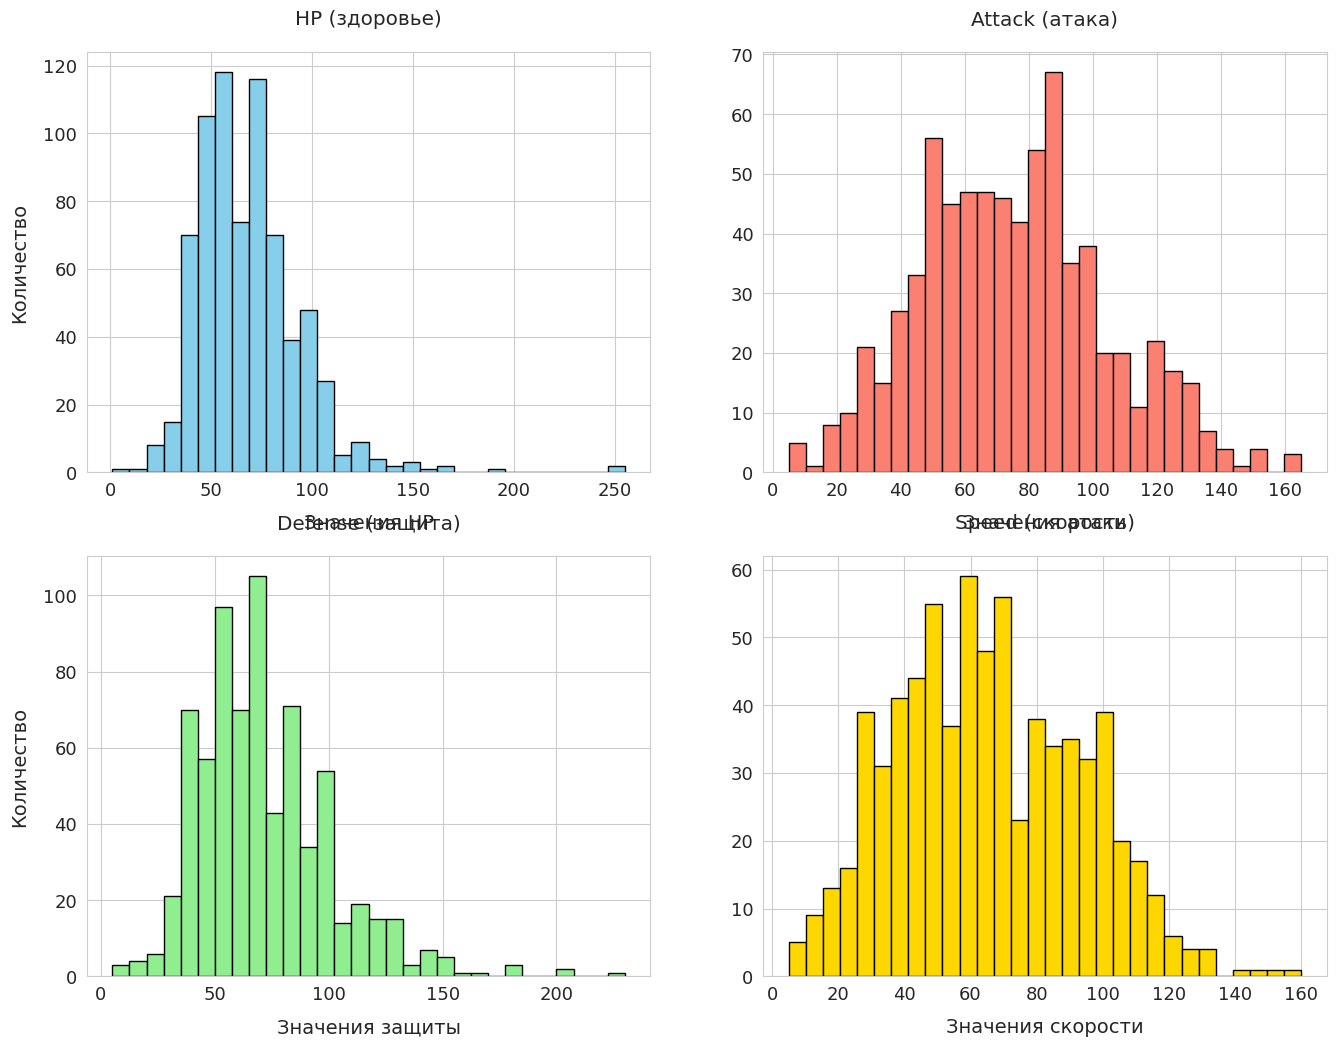

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0,0].hist(pokemon['HP'], bins=30, color='skyblue', edgecolor='black')
axes[0,0].set_title('HP (здоровье)', pad=20)
axes[0,0].set_xlabel('Значения HP', labelpad=10)
axes[0,0].set_ylabel('Количество', labelpad=10)

axes[0,1].hist(pokemon['Attack'], bins=30, color='salmon', edgecolor='black')
axes[0,1].set_title('Attack (атака)', pad=20)
axes[0,1].set_xlabel('Значения атаки', labelpad=10)

axes[1,0].hist(pokemon['Defense'], bins=30, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Defense (защита)', pad=20)
axes[1,0].set_xlabel('Значения защиты', labelpad=10)
axes[1,0].set_ylabel('Количество', labelpad=10)

axes[1,1].hist(pokemon['Speed'], bins=30, color='gold', edgecolor='black')
axes[1,1].set_title('Speed (скорость)', pad=20)
axes[1,1].set_xlabel('Значения скорости', labelpad=10)

plt.show()

## Задание 2
Нужно выбрать несколько полей и построить диаграммы:
- круговая
- гистрограмма
- график
- ящик с усами
- ViolinPlot

In [39]:
print("Столбцы в данных:", pokemon.columns.tolist())

Столбцы в данных: ['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']


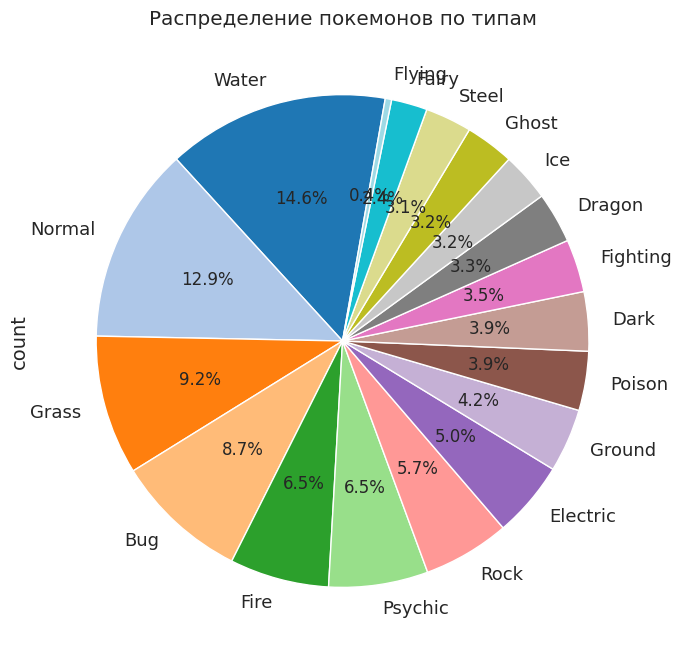

In [53]:
type_counts = pokemon['Type_1'].value_counts()
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Распределение покемонов по типам')
plt.show()

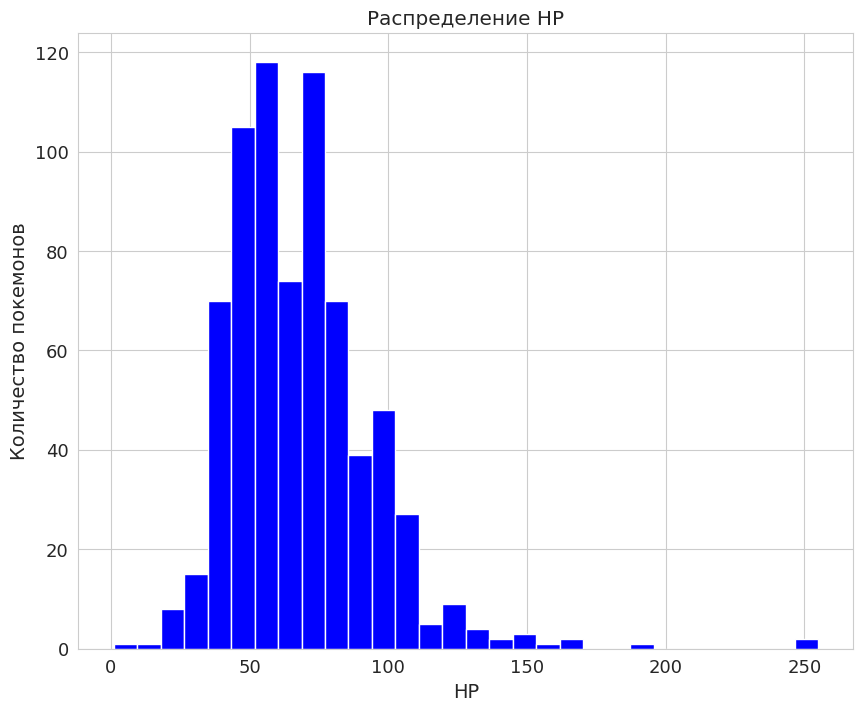

In [49]:
plt.hist(pokemon['HP'], bins=30)
plt.title('Распределение HP')
plt.xlabel('HP')
plt.ylabel('Количество покемонов')
plt.show()

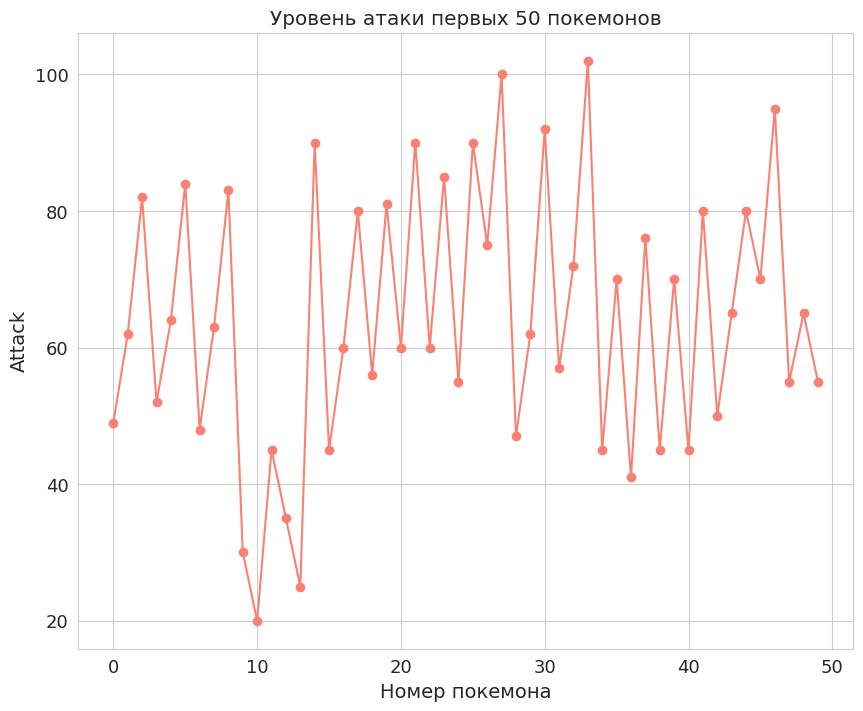

In [48]:
plt.plot(pokemon['Attack'].head(50), marker='o')
plt.title('Уровень атаки первых 50 покемонов')
plt.xlabel('Номер покемона')
plt.ylabel('Attack')
plt.show()

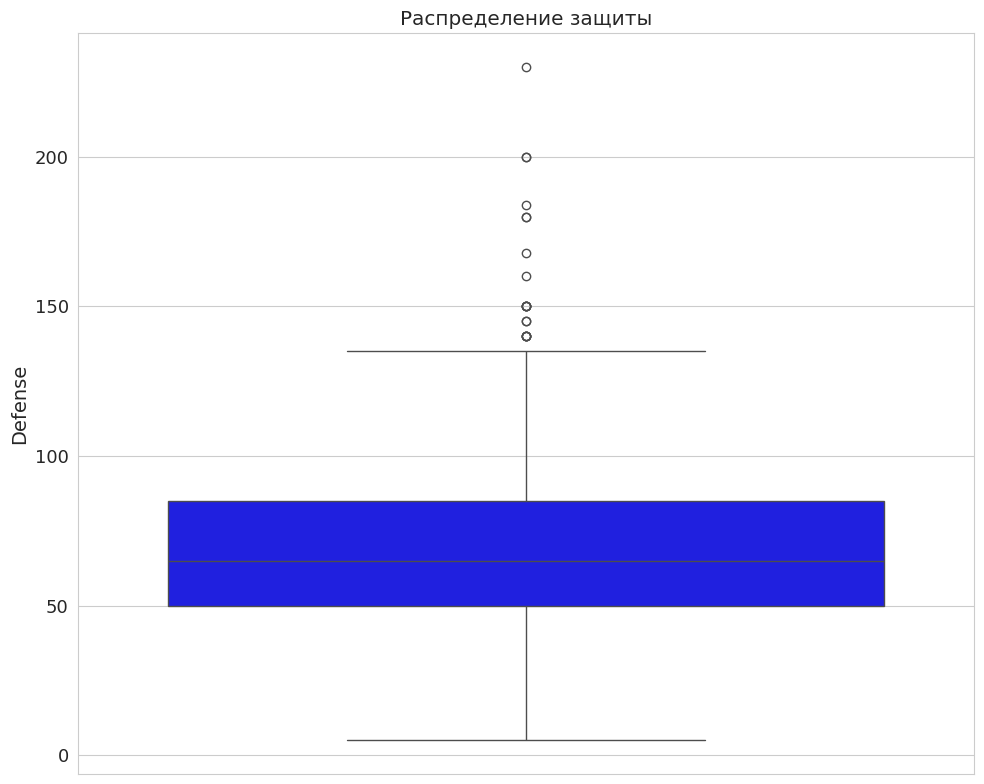

In [47]:
sns.boxplot(y=pokemon['Defense'])
plt.title('Распределение защиты')
plt.ylabel('Defense')
plt.tight_layout()
plt.show()

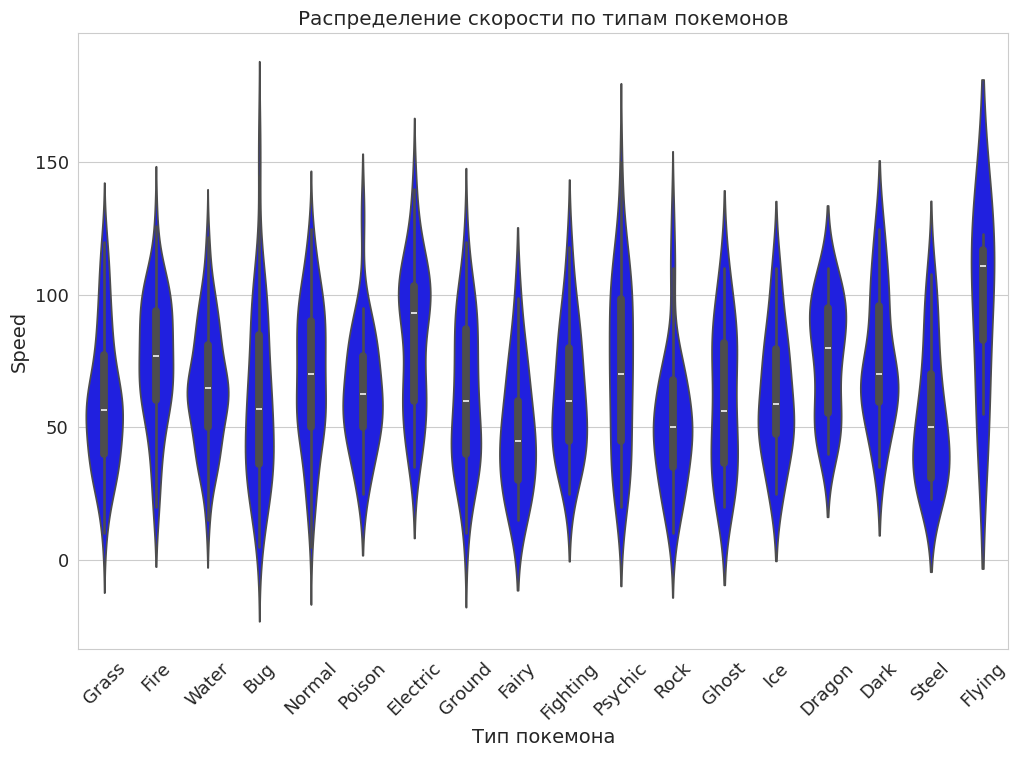

In [54]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type_1', y='Speed', data=pokemon)
plt.title('Распределение скорости по типам покемонов')
plt.xticks(rotation=45)
plt.xlabel('Тип покемона')
plt.ylabel('Speed')
plt.show()

## Задание 3
Нужно построить диаграмму рассеяния

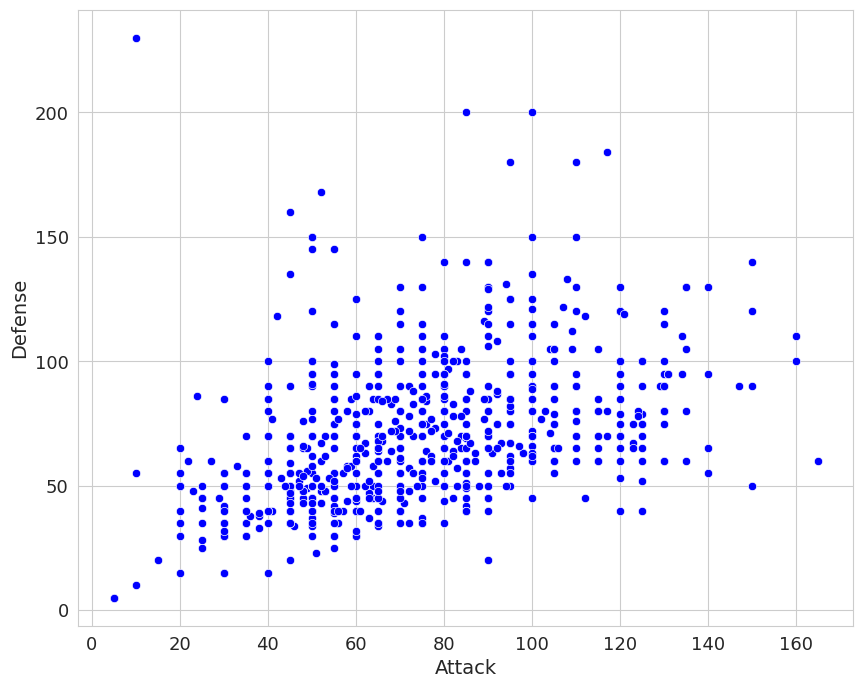

In [58]:
scatter = sns.scatterplot(
    x='Attack',
    y='Defense',
    data=pokemon,
)
plt.show()

## Задание 4
Нужно построить диаграмму распределения по полю Color

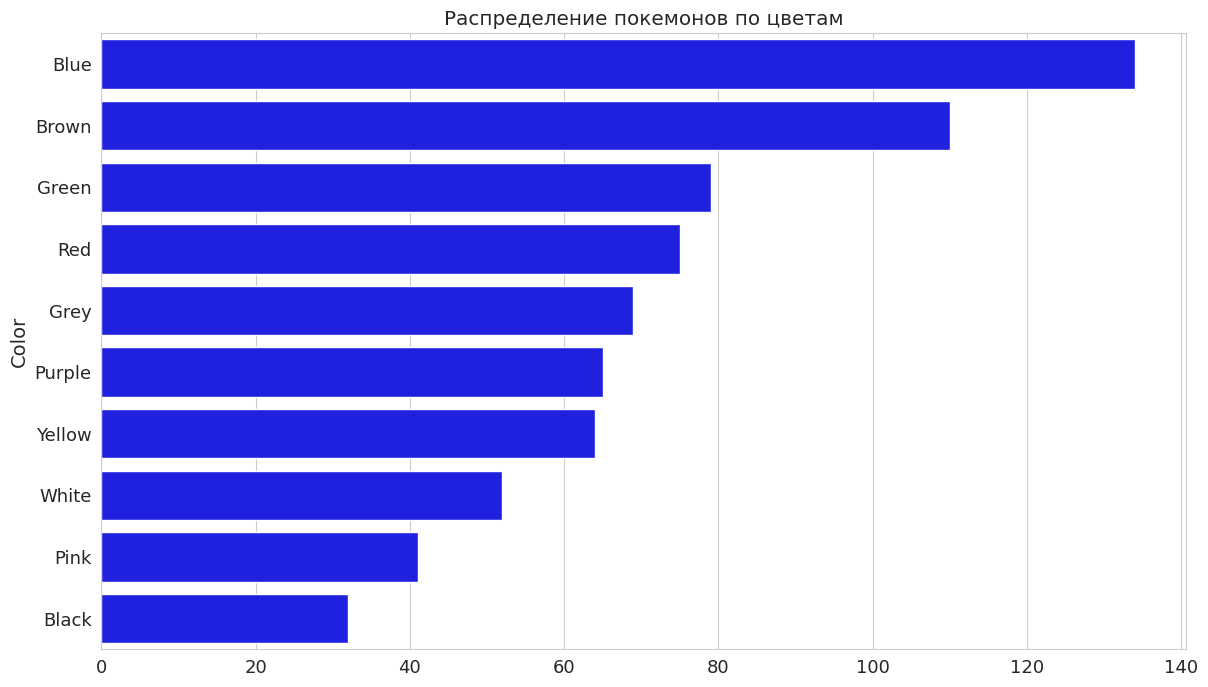

In [61]:
color_column = 'Color'
color_counts = pokemon[color_column].value_counts()
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=color_counts.values,
    y=color_counts.index
)
plt.title('Распределение покемонов по цветам')
plt.show()